In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore as pscore
import warnings
warnings.filterwarnings('ignore')
from heatmap import heatmap, corrplot

In [2]:
train = pd.read_pickle('TrucksTrainMedian.pickle')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 162 entries, class to eg_000
dtypes: category(1), float64(160), int32(1)
memory usage: 73.5 MB


In [33]:
train.nunique().sort_values(ascending = True)[20:40]

af_000     418
ay_009     447
ay_000     466
cf_000     525
ag_001     617
cg_000     646
cy_000     748
cs_008     773
aj_000     894
ay_001     919
cl_000     973
ay_002     986
ay_003    1032
dh_000    1055
bf_000    1098
az_008    1271
dg_000    1313
cn_000    1530
ay_004    1767
co_000    1860
dtype: int64

In [17]:
np.sort(train['dz_000'].unique())

array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
         18.,   20.,   22.,   28.,   30.,   32.,   34.,   36.,   38.,
         42.,   44.,   48.,   52.,   62.,   64.,   78.,   92.,  104.,
        106.,  112.,  118.,  122.,  136.,  154.,  162.,  178.,  182.,
        274.,  276.,  324.,  348.,  428.,  512.,  514.,  904.,  940.,
       1212., 1414.])

In [36]:
train['co_000'].value_counts()

8.0        15763
0.0        12793
2.0         4169
4.0         2524
6.0         1939
           ...  
17246.0        1
4344.0         1
1726.0         1
8768.0         1
8304.0         1
Name: co_000, Length: 1860, dtype: int64

<AxesSubplot:>

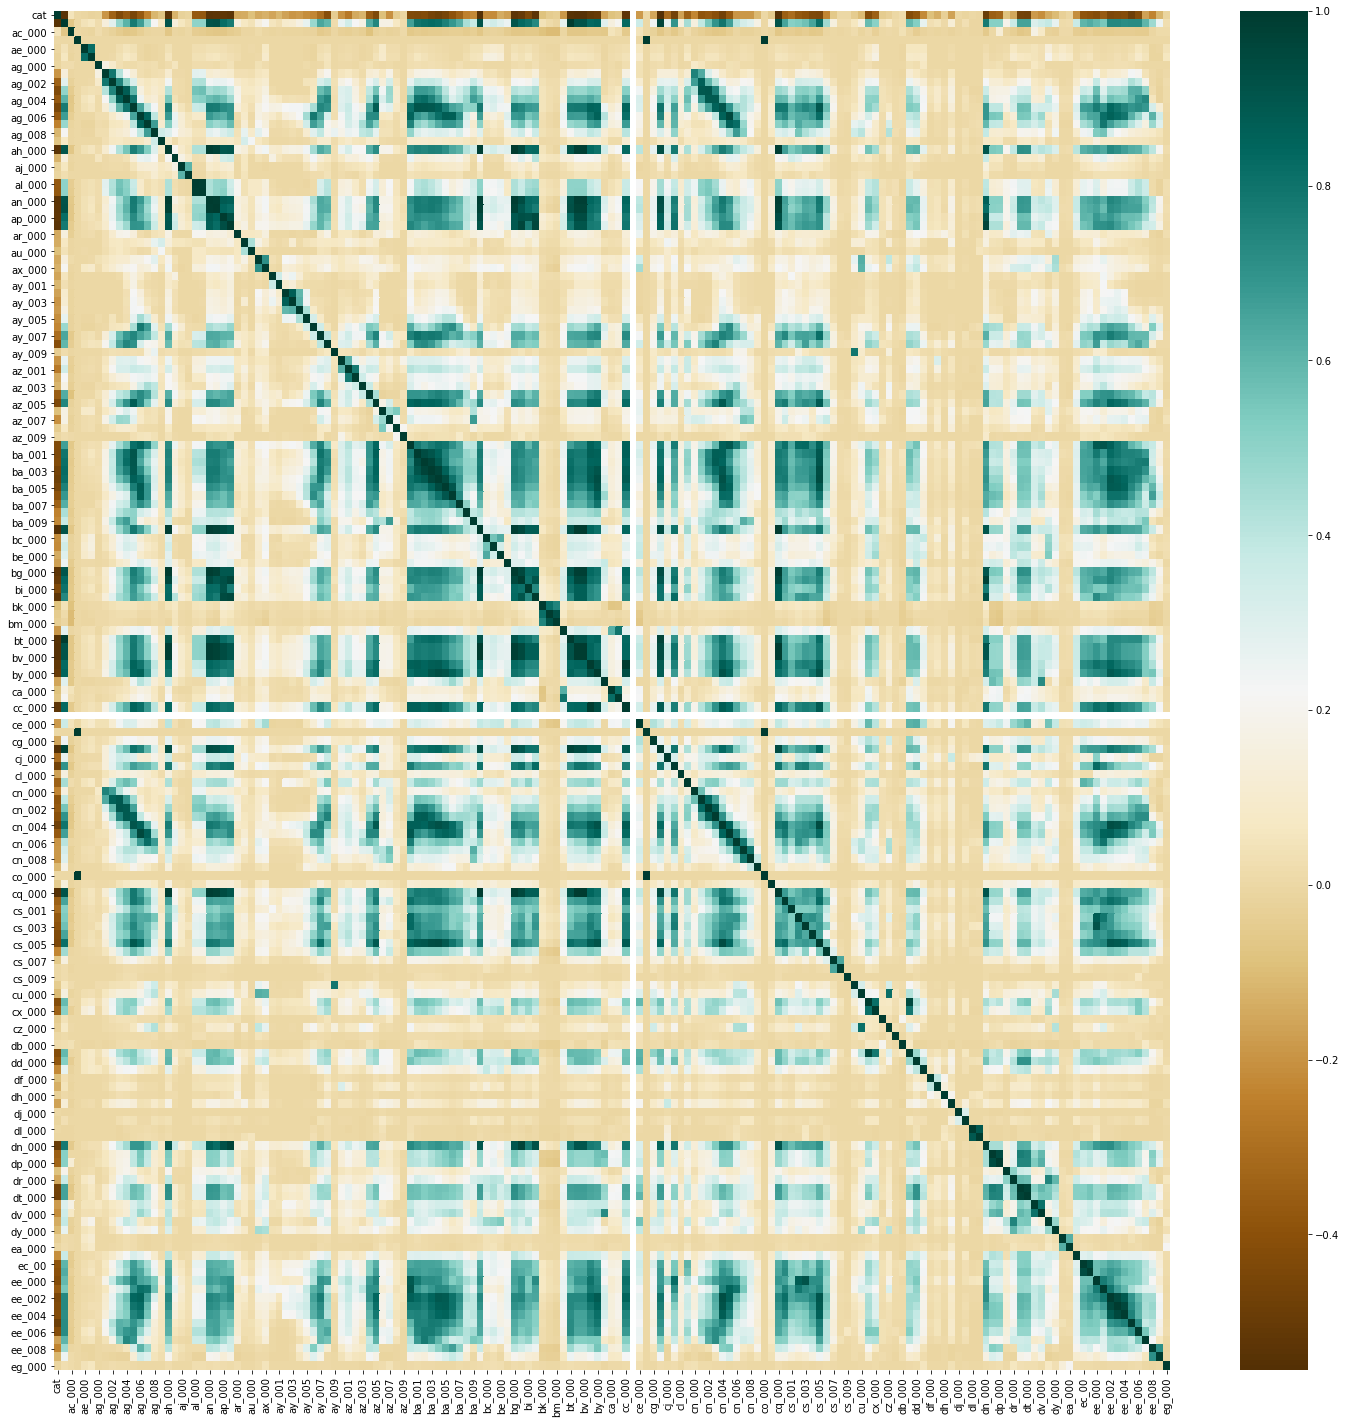

In [184]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(),cmap='BrBG')

<AxesSubplot:>

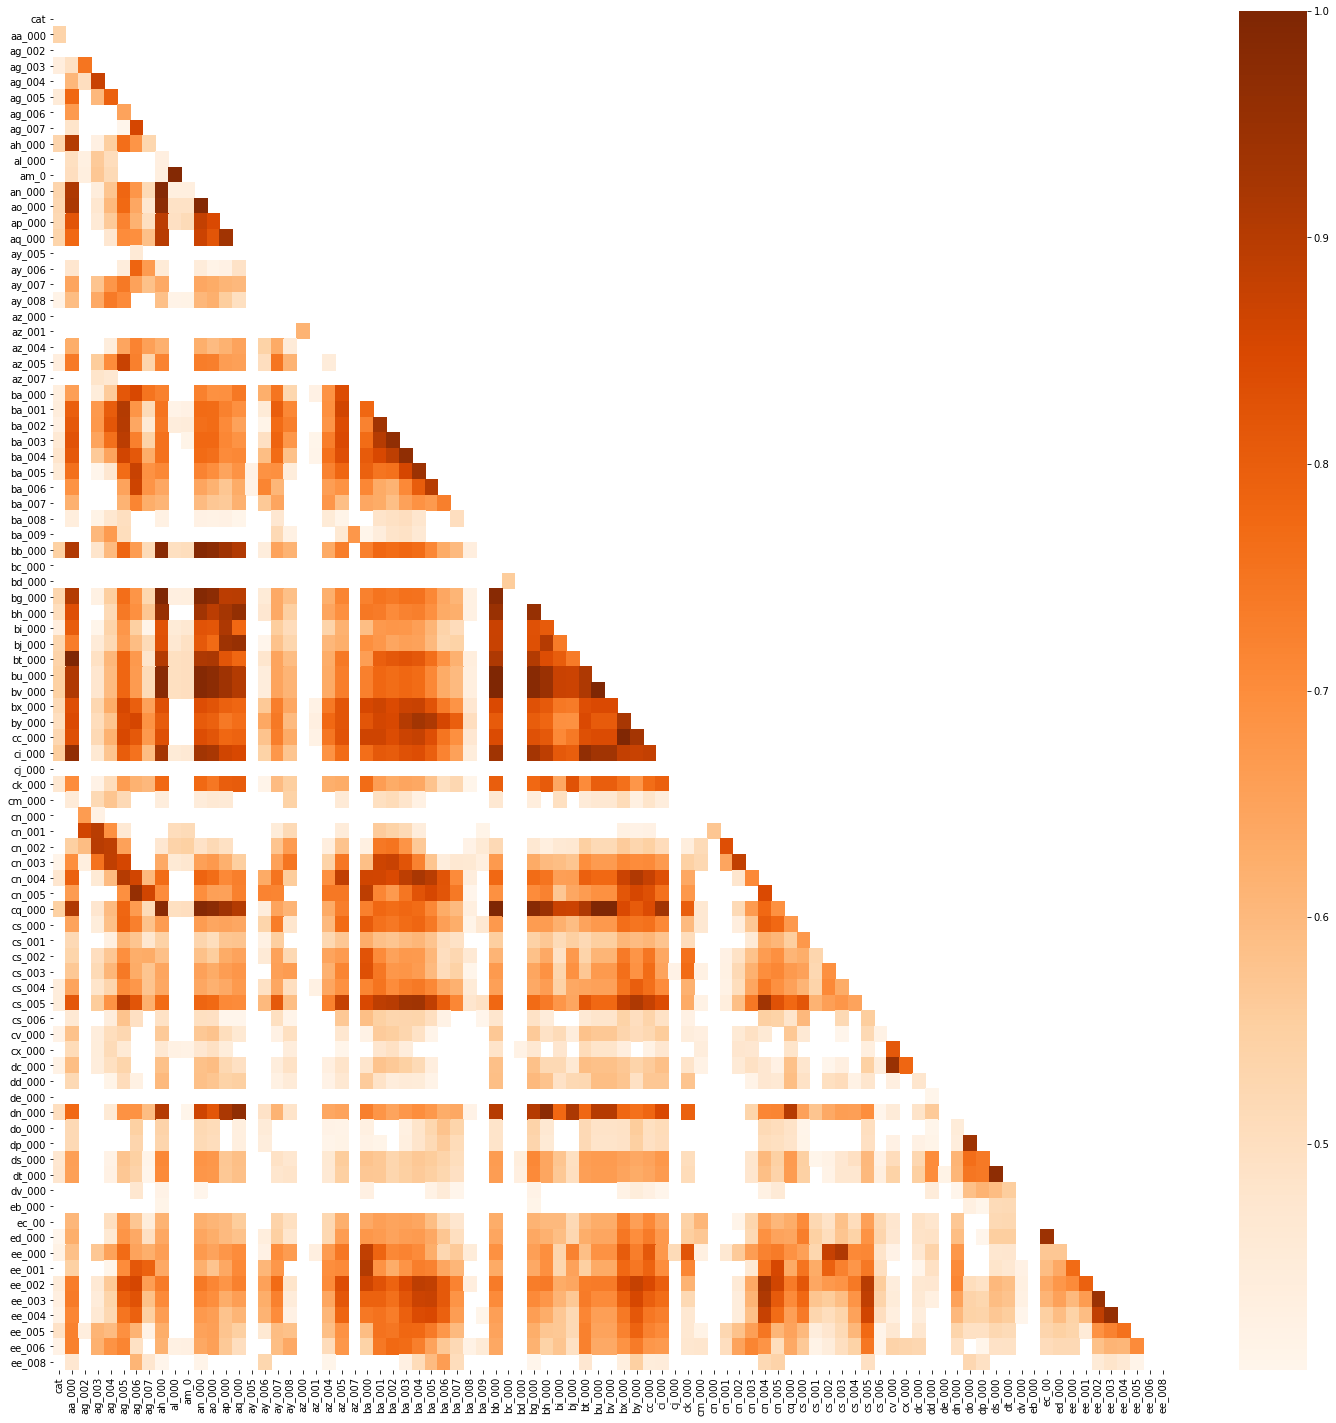

In [62]:
plt.figure(figsize=(25, 25))
#corrplot(train.corr())
x = np.abs(train.loc[:,corr[corr>0.2].index.tolist()].corr())
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True
mask[x<0.4] = True 
sns.heatmap(x,cmap='Oranges',mask=mask)

In [25]:
corr = train.corr()['cat']

In [29]:
corr = np.abs(corr)

<AxesSubplot:>

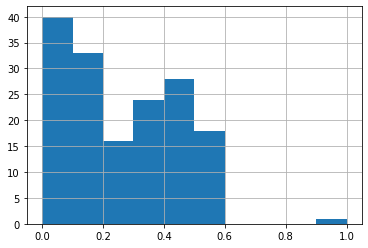

In [22]:
corr.hist()

In [4]:
corr = corr[1:]

In [7]:
corr.sort_values(inplace=True)

C:\Users\Hari\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hari\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([19., 13., 21., 14.,  4., 16., 24., 16., 18., 14.]),
 array([-0.55493736, -0.49434399, -0.43375063, -0.37315727, -0.3125639 ,
        -0.25197054, -0.19137718, -0.13078381, -0.07019045, -0.00959708,
         0.05099628]),
 <BarContainer object of 10 artists>)

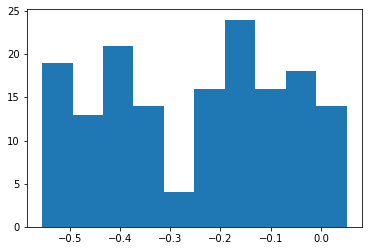

In [8]:
plt.hist(corr)

In [13]:
(corr<-0.5).sum

18

In [28]:
vis = corr[corr<-0.5]

In [51]:
len(corr)

160

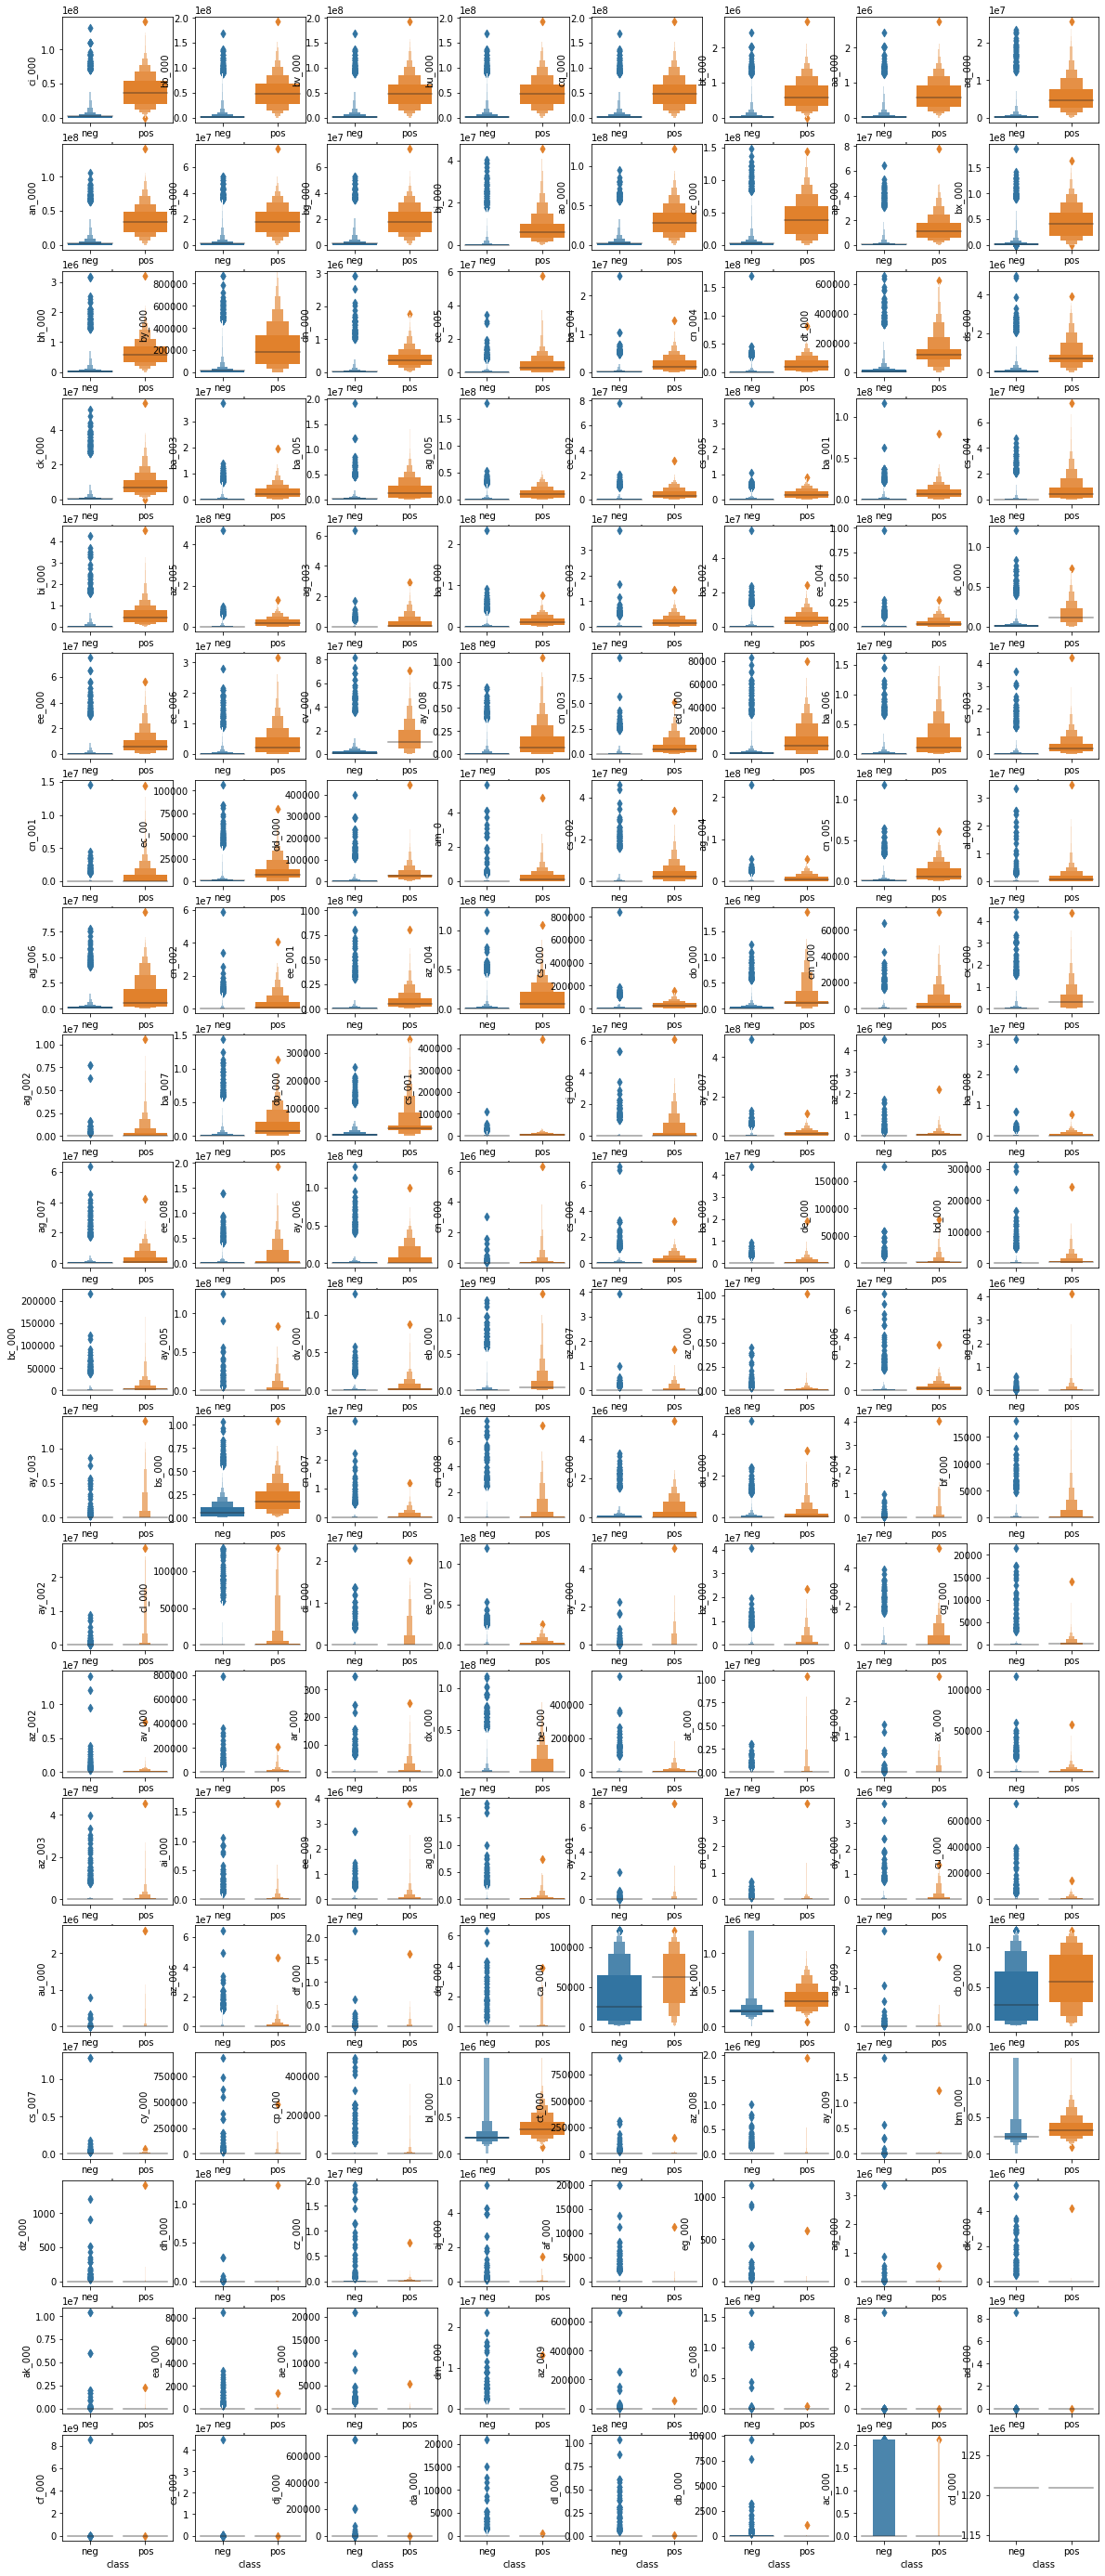

In [54]:
myit = iter(corr.index)
x = int(len(corr)/8) if len(corr)%8==0 else int(len(corr)/8)+1
y = 8
fig, ax = plt.subplots(x,y,figsize=(20,50))
for i in range(x):
    for j in range(y):
        try:
            sns.boxenplot(x='class',y=next(myit),data=train,ax=ax[i, j])
        except StopIteration:
            break
       

In [59]:
train[train['class']=='neg']['ck_000'].quantile(0.9)/10**7

0.11148582719999997

In [61]:
train[train['class']=='pos']['ck_000'].quantile(0.1)/10**7

0.21012642240000004

In [81]:
train[train['class']=='pos']['ac_000'].median()

865.0

In [92]:
(train['ad_000']>0.1*10**9).sum()

1

In [93]:
train['ad_000'].sort_values()

25445    0.000000e+00
48946    0.000000e+00
1394     0.000000e+00
9838     0.000000e+00
30139    0.000000e+00
             ...     
32079    8.410600e+04
53735    9.526600e+04
59820    1.948680e+05
57185    6.122660e+05
45977    8.584298e+09
Name: ad_000, Length: 60000, dtype: float64

In [125]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (10 * IQR)
    return lower_range,upper_range

In [126]:
outlier_treatment(train['ad_000'])

(-768.0, 3012.0)

In [131]:
(train['ad_000']>3490).sum()

600

In [132]:
train[train['class']=='pos']['ad_000'].max()

60466.0

<AxesSubplot:>

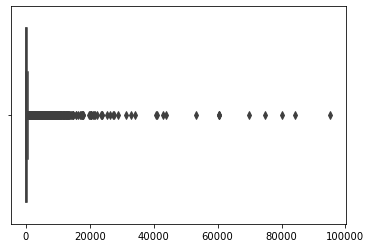

In [122]:
sns.boxplot(np.sort(train['ad_000'])[:-3])

In [130]:
np.percentile(train['ad_000'] , [25,50,75,90,99])

array([  42.  ,  124.  ,  312.  ,  788.  , 3490.06])

In [154]:
train['ad_000'].sort_values(ascending=False).index[[0,1,2,3,4,5]]

Int64Index([45977, 57185, 59820, 53735, 32079, 3973], dtype='int64')

In [156]:
train.loc[45977,:]

class            neg
cat                1
aa_000          2528
ac_000           122
ad_000    8.5843e+09
             ...    
ee_006         16944
ee_007          5100
ee_008          1806
ee_009             0
eg_000             0
Name: 45977, Length: 162, dtype: object

In [151]:
train[corr.index[0]].sort_values(ascending=False).index[[0,1,2,3,4,5]]

Int64Index([9310, 56153, 14838, 22672, 49378, 50851], dtype='int64')

In [152]:
train[corr.index[1]].sort_values(ascending=False).index[[0,1,2,3,4,5]]

Int64Index([9310, 35274, 56153, 26684, 46885, 31509], dtype='int64')

In [157]:
train.loc[9310,:]

class             pos
cat                 0
aa_000    2.74656e+06
ac_000            865
ad_000            648
             ...     
ee_006     1.3243e+06
ee_007          88164
ee_008          31356
ee_009             94
eg_000              0
Name: 9310, Length: 162, dtype: object

In [158]:
for i in range(20):
    print(train[train['class']=='pos'][corr.index[i]].sort_values(ascending=False).index[[0,1,2,3,4,5]])

Int64Index([9310, 14838, 22672, 49378, 50851, 3301], dtype='int64')
Int64Index([9310, 35274, 26684, 46885, 31509, 58936], dtype='int64')
Int64Index([9310, 35274, 26684, 46885, 31509, 58936], dtype='int64')
Int64Index([9310, 35274, 26684, 46885, 31509, 58936], dtype='int64')
Int64Index([9310, 35274, 26684, 46885, 31509, 58936], dtype='int64')
Int64Index([9310, 49378, 14838, 22672, 24385, 58936], dtype='int64')
Int64Index([9310, 49378, 22672, 14838, 24385, 58936], dtype='int64')
Int64Index([15247, 45815, 15155, 22983, 9310, 44192], dtype='int64')
Int64Index([35274, 42944, 50851, 26684, 46885, 14838], dtype='int64')
Int64Index([35274, 50851, 44192, 9310, 58936, 22672], dtype='int64')
Int64Index([35274, 50851, 44192, 9310, 58936, 22672], dtype='int64')
Int64Index([9310, 15155, 31288, 8803, 54831, 50314], dtype='int64')
Int64Index([35274, 42944, 19870, 55468, 46885, 39752], dtype='int64')
Int64Index([3301, 19870, 46885, 49378, 44192, 22672], dtype='int64')
Int64Index([9310, 35671, 45815, 34

In [206]:
out = []
for r in range(len(train)):
    temp = []
    for i in train.columns[2:]:
        temp.append(pscore(train[i],train.loc[r,i]))
    out.append((np.array(temp)>80).sum()/len(temp))

In [216]:
out = np.array(out)

(array([1235., 1072.,  845.,  648.,  395.,  431.,  291.,  103.,   25.,
           4.]),
 array([0.50625, 0.53625, 0.56625, 0.59625, 0.62625, 0.65625, 0.68625,
        0.71625, 0.74625, 0.77625, 0.80625]),
 <BarContainer object of 10 artists>)

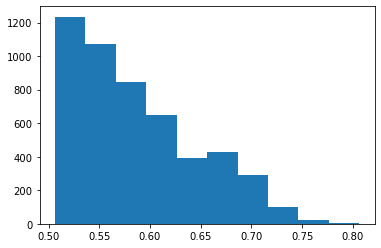

In [217]:
plt.hist(out[out>0.5])

In [226]:
outdf = pd.DataFrame(out)

In [237]:
outdf.loc[45977]

0    0.0625
Name: 45977, dtype: float64

In [235]:
train['class'].loc[outdf[outdf[0]>0.75].index]

649      pos
6898     pos
7728     neg
9537     pos
15373    pos
16830    pos
19062    pos
19296    neg
20313    neg
20683    neg
29772    neg
30613    neg
31772    neg
35545    neg
37434    neg
46045    pos
46519    neg
49816    neg
52437    neg
53531    neg
55175    pos
57662    pos
Name: class, dtype: category
Categories (2, object): ['neg', 'pos']

<AxesSubplot:>

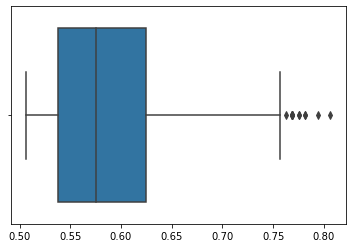

In [220]:
sns.boxplot(out[out>0.5])

<AxesSubplot:>

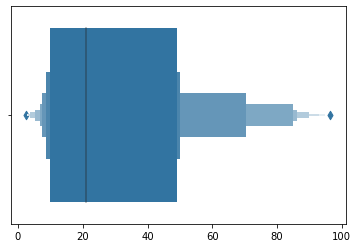

In [198]:
sns.boxenplot(temp)

In [203]:
(np.array(temp)>80).sum()/len(temp)

0.05

In [291]:
train.columns[2:]

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007',
       'ee_008', 'ee_009', 'eg_000'],
      dtype='object', length=160)

In [292]:
for i in train.columns[2:]:
    thresh = train[train['class']=='pos'][i].quantile(0.99)
    replace = train[train['class']=='pos'][i].quantile(0.75)
    train.loc[(train['class'] == 'pos') & (train[i] > thresh), i] = replace

    thresh = train[train['class']=='neg'][i].quantile(0.99)
    replace = train[train['class']=='neg'][i].quantile(0.75)
    train.loc[(a['class'] == 'neg') & (train[i] > thresh), i] = replace

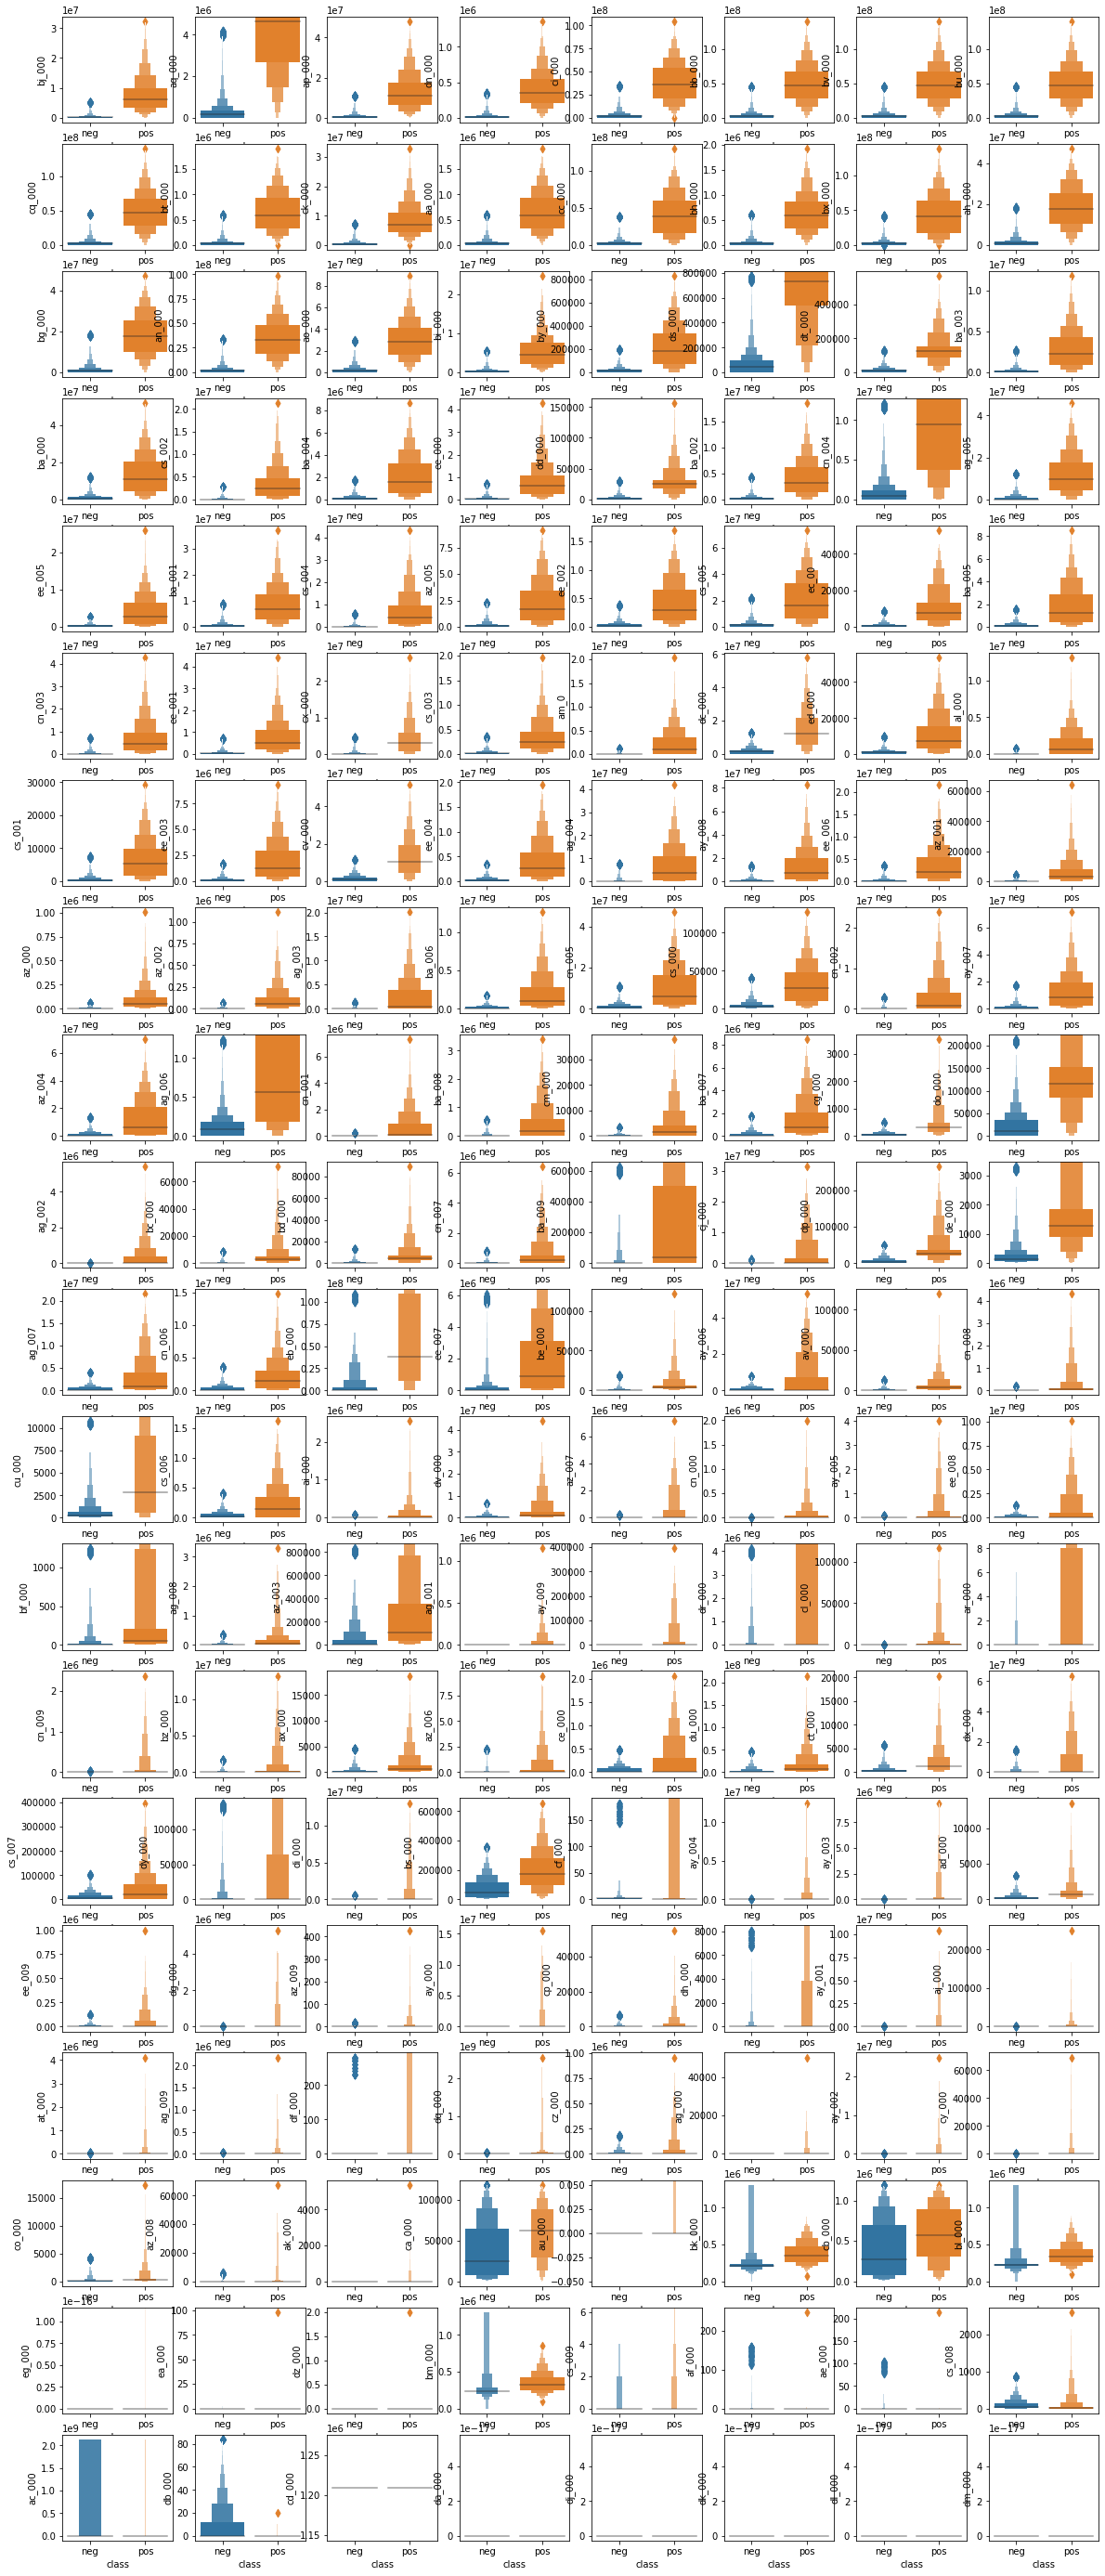

In [293]:
corr = train.corr()['cat']
corr = corr[1:]
corr.sort_values(inplace=True)
myit = iter(corr.index)
x = int(len(corr)/8) if len(corr)%8==0 else int(len(corr)/8)+1
y = 8
fig, ax = plt.subplots(x,y,figsize=(20,50))
for i in range(x):
    for j in range(y):
        try:
            sns.boxenplot(x='class',y=next(myit),data=train,ax=ax[i, j])
        except StopIteration:
            break

In [294]:
corr

bj_000   -0.706458
aq_000   -0.701641
ap_000   -0.698516
dn_000   -0.697545
ci_000   -0.695774
            ...   
da_000         NaN
dj_000         NaN
dk_000         NaN
dl_000         NaN
dm_000         NaN
Name: cat, Length: 160, dtype: float64

(array([21., 33., 15., 10., 12., 19., 15., 14., 10.,  5.]),
 array([-0.70645776, -0.62895567, -0.55145358, -0.47395149, -0.39644941,
        -0.31894732, -0.24144523, -0.16394314, -0.08644105, -0.00893897,
         0.06856312]),
 <BarContainer object of 10 artists>)

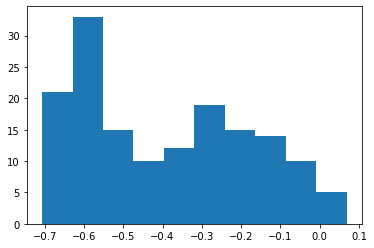

In [298]:
plt.hist(corr)

<AxesSubplot:xlabel='cat'>

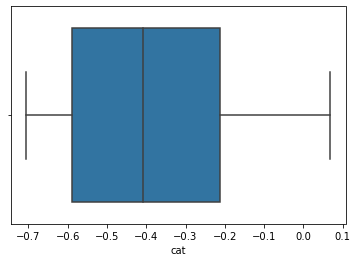

In [305]:
sns.boxplot(corr)

In [306]:
corr.median()

-0.40870174914216606

In [300]:
(corr<-0.5).sum()

64

<AxesSubplot:>

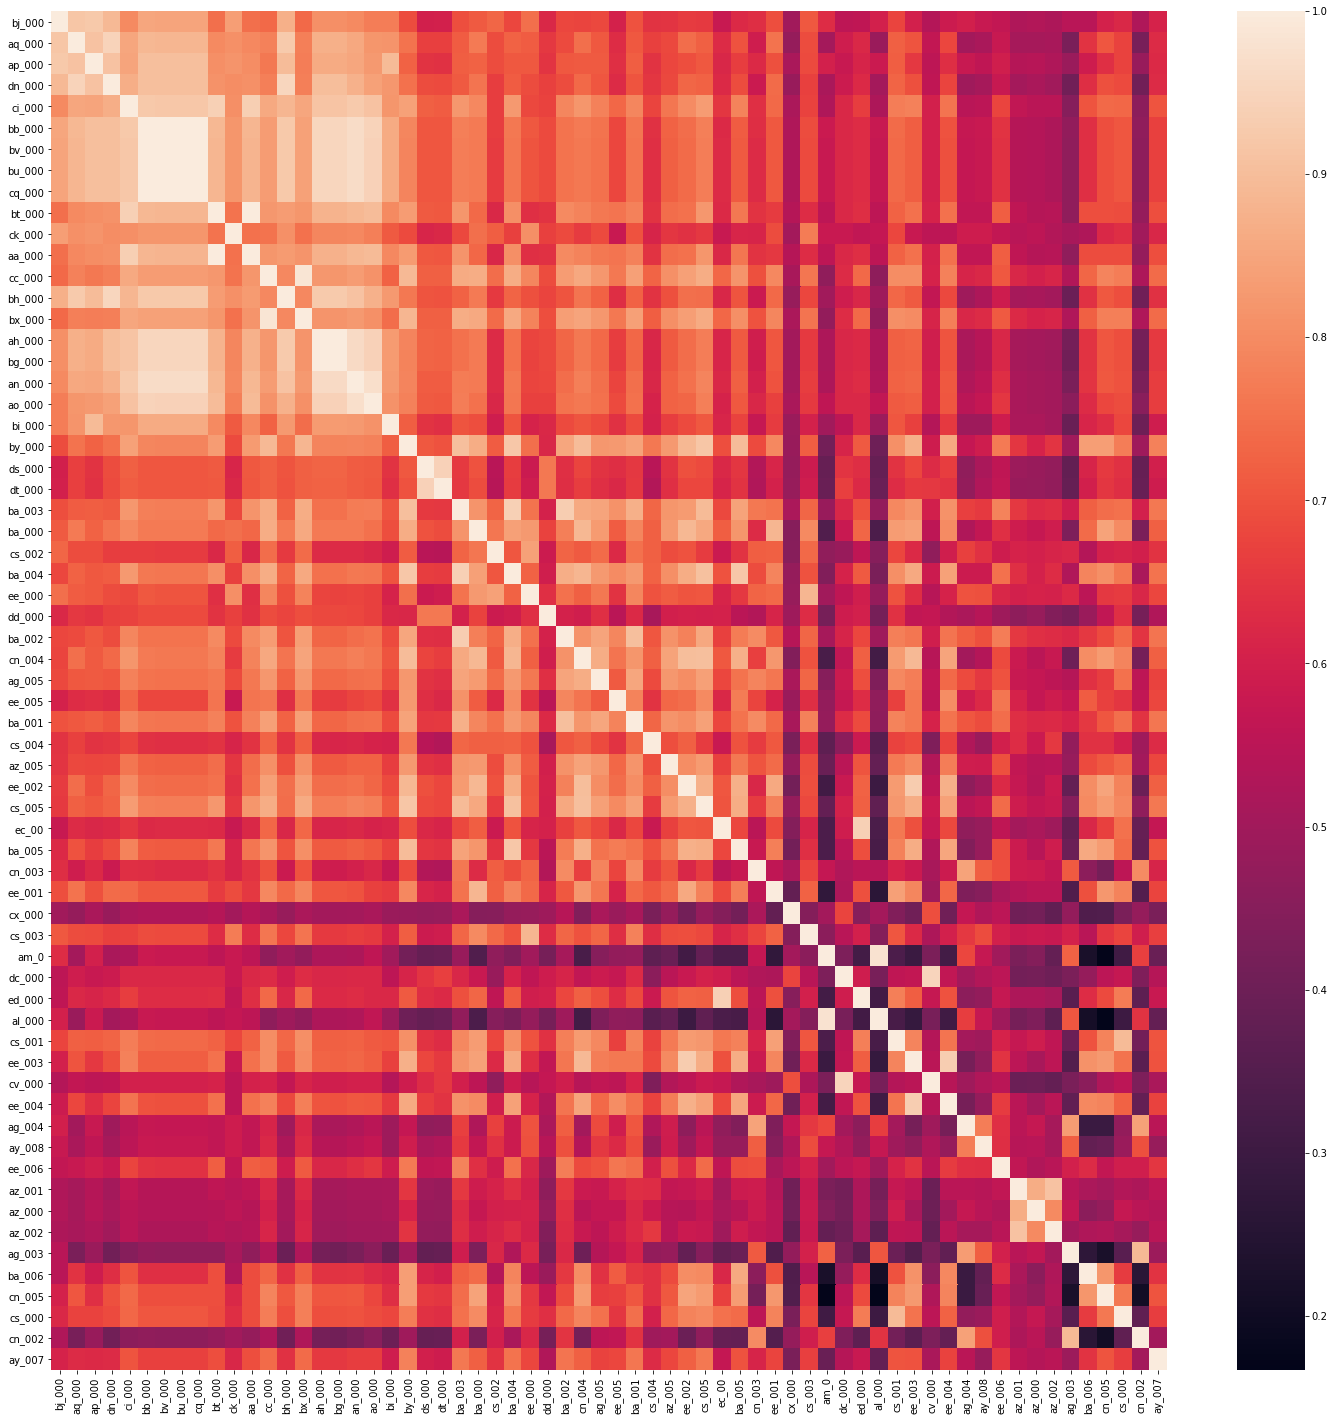

In [327]:
plt.figure(figsize=(25,25))
sns.heatmap(train.loc[:,corr[corr<-0.5].index.tolist()].corr())

<AxesSubplot:xlabel='class', ylabel='aa_000'>

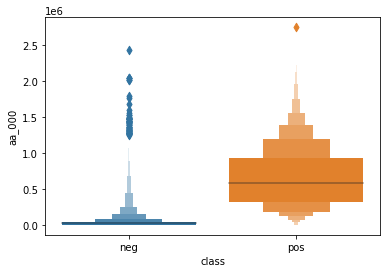

In [280]:
sns.boxenplot(x='class',y='aa_000',data=train)

In [245]:
(train[train['class']=='pos']['aa_000']>2.2*10**6).value_counts()

False    996
True       4
Name: aa_000, dtype: int64

In [251]:
train[train['class']=='pos']['aa_000'].sort_values(ascending=False)[:5]

9310     2746564.0
49378    2316926.0
22672    2220448.0
14838    2220448.0
24385    2111010.0
Name: aa_000, dtype: float64

In [275]:
train[train['class']=='pos']['aa_000'].quantile(0.99)

1901271.8399999999

In [260]:
(train[train['class']=='neg']['aa_000']>1*10**6).value_counts()

False    58837
True       163
Name: aa_000, dtype: int64

In [285]:
train[train['class']=='neg']['aa_000'].quantile(0.5)

30416.0

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Hari\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<AxesSubplot:ylabel='cat'>

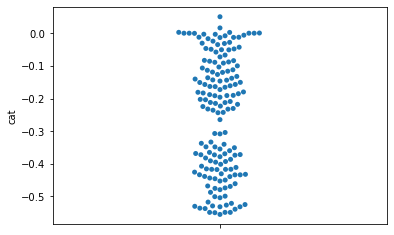

In [61]:

sns.swarmplot(y=corr)

In [54]:
corr.max()

0.050996280464110824

In [55]:
corr.min()

-0.5549373583113066

In [56]:
corr.sort_values()

ci_000   -0.554937
bb_000   -0.549628
bv_000   -0.548656
bu_000   -0.548656
cq_000   -0.548656
            ...   
da_000    0.002974
dl_000    0.003224
db_000    0.016747
ac_000    0.050996
cd_000         NaN
Name: cat, Length: 160, dtype: float64

In [ ]:
sns.pairplot(train)

<AxesSubplot:xlabel='cat', ylabel='ci_000'>

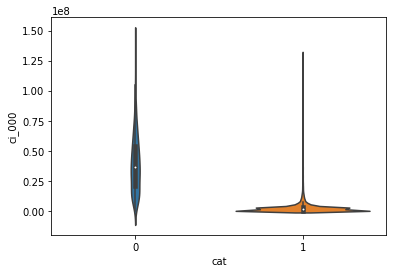

In [63]:
sns.violinplot(y='ci_000',x='cat',data=train)

In [64]:
pd.qcut(corr,4)

aa_000    (-0.556, -0.417]
ac_000     (-0.101, 0.051]
ad_000     (-0.101, 0.051]
ae_000     (-0.101, 0.051]
af_000     (-0.101, 0.051]
                ...       
ee_006    (-0.417, -0.218]
ee_007    (-0.218, -0.101]
ee_008    (-0.417, -0.218]
ee_009    (-0.218, -0.101]
eg_000     (-0.101, 0.051]
Name: cat, Length: 160, dtype: category
Categories (4, interval[float64]): [(-0.556, -0.417] < (-0.417, -0.218] < (-0.218, -0.101] < (-0.101, 0.051]]

In [65]:
train.head(1)

,class,cat,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,eg_000
0,neg,1,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0


In [72]:
X = train.loc[:,'aa_000':]
y = train['cat']

In [73]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\Hari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
clf.score(X, y)

0.9900666666666667

In [267]:
test = pd.read_pickle('TrucksTestMedian.pickle')

In [76]:
Xtest = test.loc[:,'aa_000':]
ytest = test['cat']

In [78]:
predict = clf.predict(Xtest)

In [79]:
clf.score(Xtest, ytest)

0.9874375

In [88]:
logrdf = pd.DataFrame({'real':ytest,'predicted':predict})

In [96]:
result = logrdf[logrdf['real'] != logrdf['predicted']]

In [101]:
result['cost'] = (result['real']==0).map({True:500, False:10})

C:\Users\Hari\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
result.head()

,real,predicted,cost
100,0,1,500
287,1,0,10
345,1,0,10
426,0,1,500
428,0,1,500


In [103]:
result['cost'].sum()

73550

In [104]:
test['cat'].value_counts()

1    15625
0      375
Name: cat, dtype: int64

In [116]:
#check all 
print('check all:',15625*10)
#check none
print('check none:',375*500)

check all: 156250
check none: 187500


In [106]:
result['real'].value_counts()

0    146
1     55
Name: real, dtype: int64

In [107]:
mydf = test[['cat','ci_000']]

In [109]:
mydf.head()

,cat,ci_000
0,1,5913.60
1,1,7224.96
2,1,3594885.12
3,1,3387773.76
4,1,94319.04


In [111]:
mydf['pred'] = (mydf['ci_000']>8772464.620800002).map({True:0, False:1})

C:\Users\Hari\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
myresult = mydf[mydf['cat'] != mydf['pred']]
myresult['cost'] = (myresult['cat']==0).map({True:500, False:10})

C:\Users\Hari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
myresult.head()

,cat,ci_000,pred,cost
54,1,10540890.24,0,10
56,1,21366302.40,0,10
75,1,11802167.04,0,10
84,1,12612971.52,0,10
100,0,1248516.48,1,500


In [115]:
myresult['cost'].sum()

18450

In [118]:
test.corr()['cat'].sort_values()

ci_000   -0.626179
bb_000   -0.604537
bv_000   -0.603883
bu_000   -0.603883
cq_000   -0.603883
            ...   
af_000    0.009237
ac_000    0.064923
db_000    0.068005
cat       1.000000
cd_000         NaN
Name: cat, Length: 161, dtype: float64

In [181]:
best_ = pd.DataFrame()
for i in np.arange(0.03,0.035,0.00001):
    temp = test[test['class']=='pos']['ci_000'].quantile(i)
    y = test[test['ci_000']>temp]['class'].value_counts()
    best_[i] = [y['neg'],y['pos']]
best_=best_.T
best_.columns = ['neg','pos']
best_['cost'] = best_['neg']*10 + (test['class'].value_counts()['pos']-best_['pos'])*500
best_.sort_values('cost',inplace=True)

In [182]:
best_.head()

,neg,pos,cost
0.03475,1148,362,17980
0.03474,1149,362,17990
0.03473,1150,362,18000
0.03472,1150,362,18000
0.03471,1150,362,18000


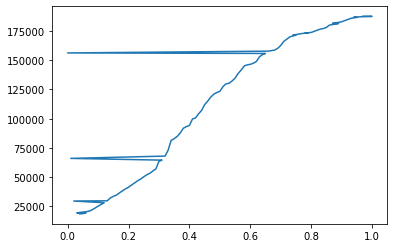

In [129]:
plt.plot(best_.cost)

In [148]:
test[test['class']=='pos']['ci_000'].quantile(.04)

7258860.4416

In [152]:
best = pd.DataFrame()
for i in range(7000000,10000000,300):
    cost = test[test['ci_000']>=i]['class'].value_counts()['neg']*10 + test[test['ci_000']<i]['class'].value_counts()['pos']*500
    temp = pd.DataFrame([i,cost]).T
    best = best.append(temp)

<AxesSubplot:xlabel='0'>

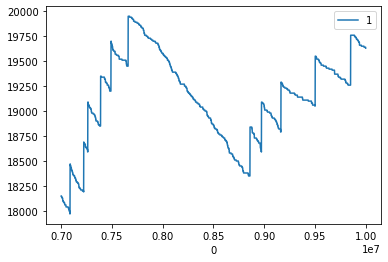

In [156]:
best.plot(x=0,y=1)

In [160]:
best[best[1]==17970]

,0,1
0,7084600,17970
0,7084900,17970
0,7085200,17970
0,7085500,17970
0,7085800,17970


In [170]:
best = pd.DataFrame()
for i in range(7085000,7086000):
    cost = test[test['ci_000']>=i]['class'].value_counts()['neg']*10 + test[test['ci_000']<i]['class'].value_counts()['pos']*500
    temp = pd.DataFrame([i,cost]).T
    best = best.append(temp)

<AxesSubplot:xlabel='0'>

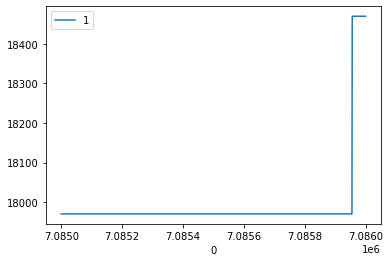

In [171]:
best.plot(x=0,y=1)

In [169]:
best[1].min()

17970

In [174]:
test[test['ci_000']>=7085200]['class'].value_counts()

neg    1147
pos     362
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='ci_000'>

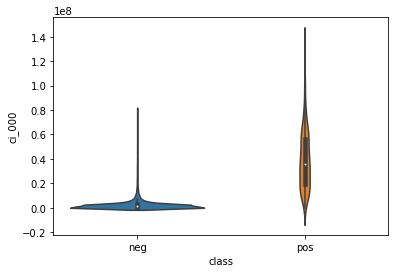

In [131]:
sns.violinplot(x='class',y='ci_000',data=test)

In [146]:
pd.qcut(test['ci_000'][test['class']=='neg'],4)

0               (-0.001, 49642.56]
1               (-0.001, 49642.56]
2        (2782033.92, 80265947.52]
3        (2782033.92, 80265947.52]
4           (49642.56, 1836354.24]
                   ...            
15995    (2782033.92, 80265947.52]
15996           (-0.001, 49642.56]
15997    (2782033.92, 80265947.52]
15998           (-0.001, 49642.56]
15999           (-0.001, 49642.56]
Name: ci_000, Length: 15625, dtype: category
Categories (4, interval[float64]): [(-0.001, 49642.56] < (49642.56, 1836354.24] < (1836354.24, 2782033.92] < (2782033.92, 80265947.52]]

In [147]:
pd.qcut(test['ci_000'][test['class']=='pos'],4)

42       (56061687.36, 133766558.4]
100           (-0.001, 19431377.76]
426      (56061687.36, 133766558.4]
428           (-0.001, 19431377.76]
434      (56061687.36, 133766558.4]
                    ...            
15736         (-0.001, 19431377.76]
15783    (19431377.76, 36023616.96]
15799    (36023616.96, 56061687.36]
15955    (56061687.36, 133766558.4]
15994         (-0.001, 19431377.76]
Name: ci_000, Length: 375, dtype: category
Categories (4, interval[float64]): [(-0.001, 19431377.76] < (19431377.76, 36023616.96] < (36023616.96, 56061687.36] < (56061687.36, 133766558.4]]